**Submission Dicoding Proyek Akhir : Image Classification Model Deployment**

Nama : Didik Kurniawan

Username Dicoding : didik_kurniawan_slVA

Email : didik2584@gmail.com

***Import library***

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
from shutil import copyfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


***Extract the zip file***

In [15]:
dataset_path = "/content/drive/My Drive/data/Satellite_Image.zip"
zip_file = zipfile.ZipFile(dataset_path, 'r')
zip_file.extractall("./tmp/")
zip_file.close()

***Create a folder for cloud image data***

In [27]:
import zipfile
import os
import pandas as pd

dataset_path = "/content/drive/My Drive/data/Satellite_Image.zip"
zip_file = zipfile.ZipFile(dataset_path, 'r')
zip_file.extractall("./tmp/")
zip_file.close()

cloudy_folder = os.path.join('./tmp/data/cloudy')

len_cloudy_folder = len(os.listdir(cloudy_folder))
print("Total cloudy pictures:", len_cloudy_folder)

cloudy = os.listdir(cloudy_folder)
print("5 data in the cloudy folder:")
i = 0
cloudy_temp = []
for file_cloudy in cloudy[:5]:
    cloudy_temp.append(file_cloudy)
    i = i + 1
data_cloudy = {'File Name': cloudy_temp}
df_cloudy = pd.DataFrame(data_cloudy, index=[1, 2, 3, 4, 5])
df_cloudy.head()

Total cloudy pictures: 1500
5 data in the cloudy folder:


,File Name
1,train_7367.jpg
2,train_1836.jpg
3,train_40311.jpg
4,train_16915.jpg
5,train_5675.jpg


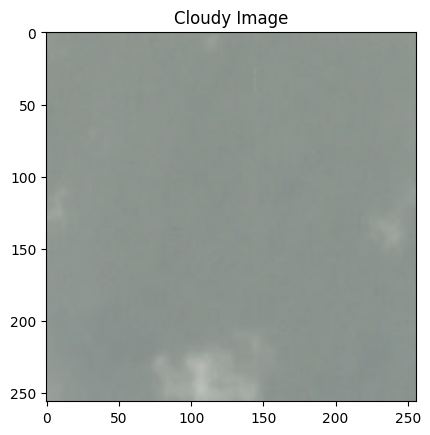

In [28]:
image_cloud_path = os.path.join(cloudy_folder, 'train_14090.jpg')
image_cloud = image.load_img(image_cloud_path)
image_cloud_plot = plt.imshow(image_cloud)
plt.title('Cloudy Image')
plt.show()

***Create a folder for desert image data***

In [29]:
desert_folder = os.path.join('./tmp/data/desert')

len_desert_folder = len(os.listdir(desert_folder))
print("Total desert pictures:", len_desert_folder)

desert = os.listdir(desert_folder)
print("5 data in the desert folder:")
i = 0
desert_temp = []
for file_desert in desert[:5]:
    desert_temp.append(file_desert)
    i = i + 1
data_desert = {'File Name': desert_temp}
df_desert = pd.DataFrame(data_desert, index=[1, 2, 3, 4, 5])
df_desert.head()

Total desert pictures: 1131
5 data in the desert folder:


,File Name
1,desert(765).jpg
2,desert(709).jpg
3,desert(450).jpg
4,desert(677).jpg
5,desert(461).jpg


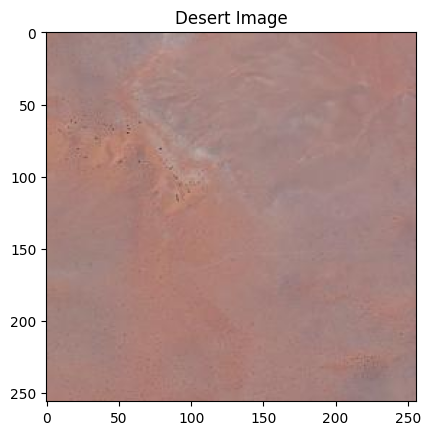

In [30]:
image_desert_path = os.path.join(desert_folder, 'desert(248).jpg')
image_desert = image.load_img(image_desert_path)
image_desert_plot = plt.imshow(image_desert)
plt.title('Desert Image')
plt.show()

***Create a folder for green area image data***

In [31]:
green_area_folder = os.path.join('./tmp/data/green_area')

len_green_area_folder = len(os.listdir(green_area_folder))
print("Total green area pictures:", len_green_area_folder)

green_area = os.listdir(green_area_folder)
print("5 data in the green area folder:")
i = 0
green_area_temp = []
for file_green_area in green_area[:5]:
    green_area_temp.append(file_green_area)
    i = i + 1
data_green_area = {'File Name': green_area_temp}
df_green_area = pd.DataFrame(data_green_area, index=[1, 2, 3, 4, 5])
df_green_area.head()

Total green area pictures: 1500
5 data in the green area folder:


,File Name
1,Forest_199.jpg
2,Forest_2834.jpg
3,Forest_959.jpg
4,Forest_2188.jpg
5,Forest_647.jpg


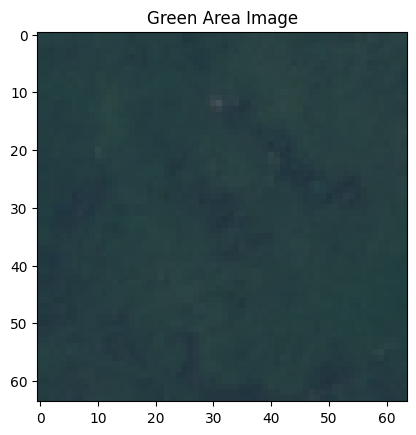

In [32]:
image_green_area_path = os.path.join(green_area_folder, 'Forest_2315.jpg')
image_green_area = image.load_img(image_green_area_path)
image_green_area_plot = plt.imshow(image_green_area)
plt.title('Green Area Image')
plt.show()

***Create a folder for water image data***

In [33]:
water_folder = os.path.join('./tmp/data/water')

len_water_folder = len(os.listdir(water_folder))
print("Total water pictures:", len_water_folder)

water = os.listdir(water_folder)
print("5 data in the water folder:")
i = 0
water_temp = []
for file_water in water[:5]:
    water_temp.append(file_water)
    i = i + 1
data_water = {'File Name': water_temp}
df_water = pd.DataFrame(data_water, index=[1, 2, 3, 4, 5])
df_water.head()

Total water pictures: 1500
5 data in the water folder:


,File Name
1,SeaLake_760.jpg
2,SeaLake_660.jpg
3,SeaLake_949.jpg
4,SeaLake_1644.jpg
5,SeaLake_634.jpg


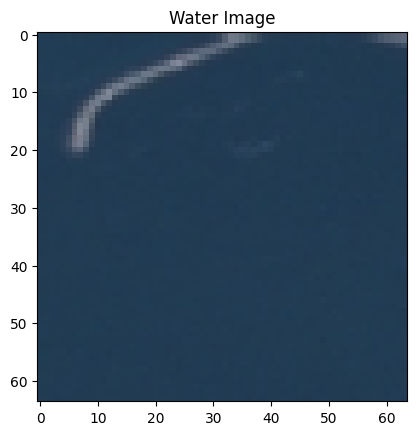

In [34]:
image_water_path = os.path.join(water_folder, 'SeaLake_245.jpg')
image_water = image.load_img(image_water_path)
image_water_plot = plt.imshow(image_water)
plt.title('Water Image')
plt.show()

***Using Image Generator***

In [38]:
train_dir = os.path.join("./tmp/data")

In [39]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)

In [40]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical',
        subset='validation')

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


***Make models***

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1.0000e-04)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [44]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.92 or logs.get('val_accuracy')>=0.92):
      print("\nAccuracy or Validation Accuracy has reached 0.92")
      self.model.stop_training = True
callbacks = myCallback()

In [45]:
history = train_models = model.fit(
      train_generator,
      batch_size=64,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=[callbacks])

Epoch 1/100
113/113 [==============================] - 251s 2s/step - loss: 0.7476 - accuracy: 0.6155 - val_loss: 0.5452 - val_accuracy: 0.6700
Epoch 2/100
113/113 [==============================] - 247s 2s/step - loss: 0.4844 - accuracy: 0.7445 - val_loss: 0.5582 - val_accuracy: 0.6500
Epoch 3/100
113/113 [==============================] - 247s 2s/step - loss: 0.4645 - accuracy: 0.7780 - val_loss: 0.5121 - val_accuracy: 0.7000
Epoch 4/100
113/113 [==============================] - 250s 2s/step - loss: 0.4330 - accuracy: 0.8213 - val_loss: 0.6504 - val_accuracy: 0.6600
Epoch 5/100
113/113 [==============================] - 246s 2s/step - loss: 0.3958 - accuracy: 0.8444 - val_loss: 0.6368 - val_accuracy: 0.6250
Epoch 6/100
113/113 [==============================] - 250s 2s/step - loss: 0.3606 - accuracy: 0.8559 - val_loss: 0.5794 - val_accuracy: 0.6750
Epoch 7/100
113/113 [==============================] - 257s 2s/step - loss: 0.3383 - accuracy: 0.8648 - val_loss: 0.4993 - val_accuracy:

***Loss and Accuracy Plots During Training and Validation***

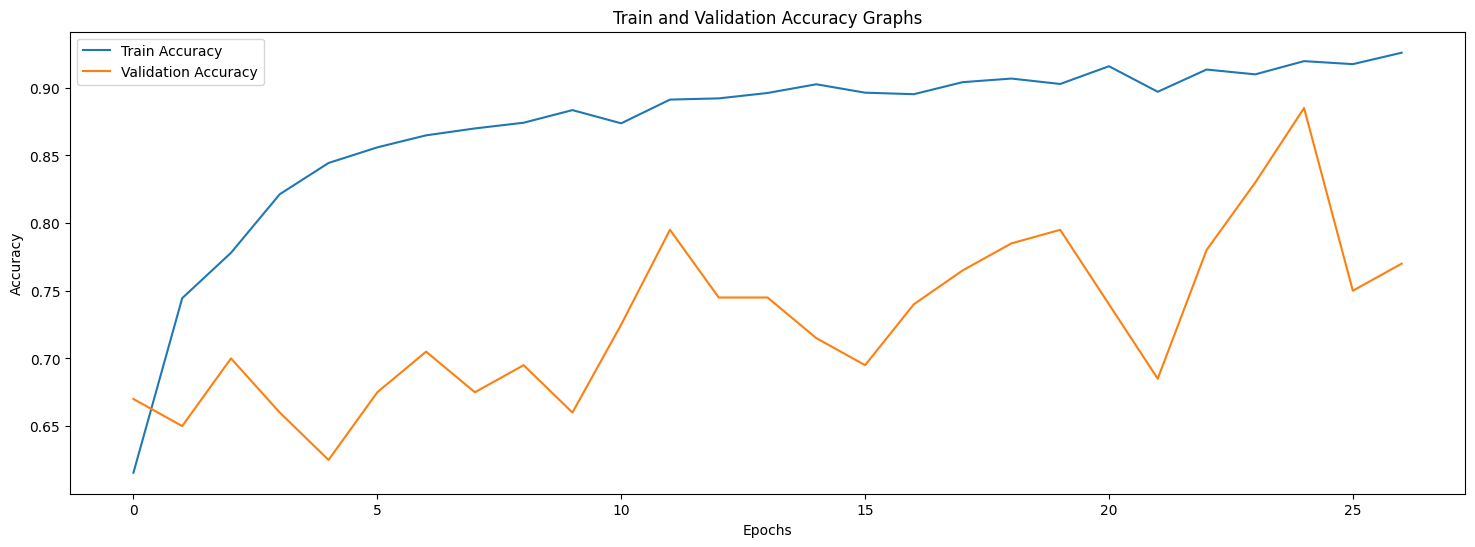

In [46]:
plt.figure(figsize=(18, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Graphs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

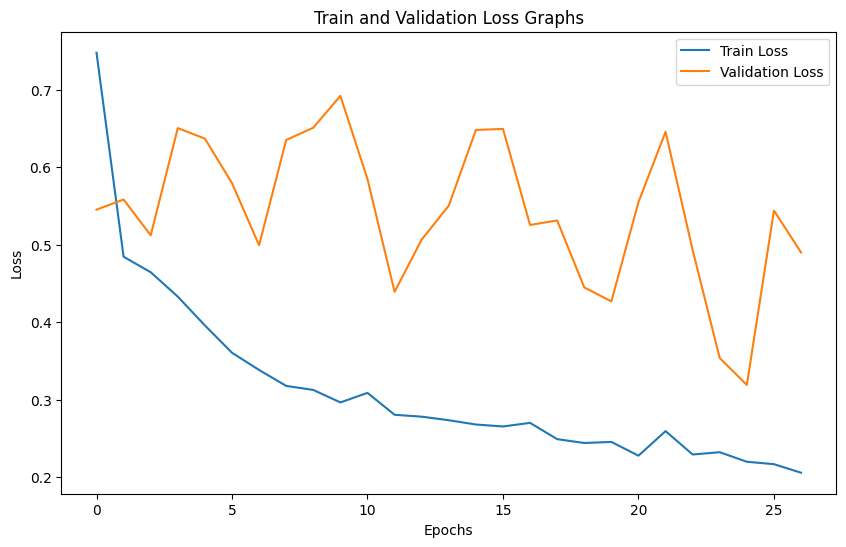

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Saving PW-2014-12-10-Crosswell-water.jpg to PW-2014-12-10-Crosswell-water.jpg
1/1 [==============================] - 0s 194ms/step
PW-2014-12-10-Crosswell-water.jpg
This picture shows water


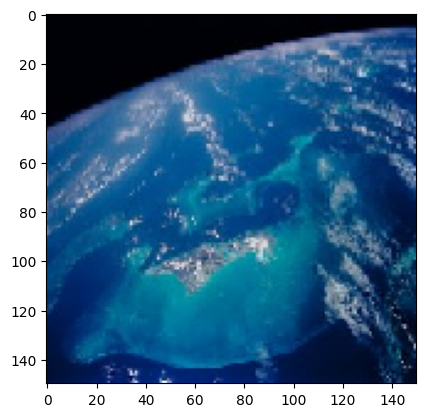

In [48]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('This picture shows cloud')
  elif classes[0,1]!=0:
    print('This picture shows disert')
  elif classes[0,2]!=0:
    print('This picture shows green area')
  elif classes[0,3]!=0:
    print('This picture shows water')
  else:
    print('Unknown image')

***Konversi Model***

In [49]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [50]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)